## **Task 1:** 

## **Dataset's Content**

**age** - Age.

**sex** - Sex.

**bmi** - Body mass index.

**children** - # of children.

**smoker** - Smoke or not.

**region** - Region.

**charges** - Medical insurance costs.



Importing Libraries

In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading Dataset

In [408]:
data = pd.read_csv(r"d:\My Data\data sets\Medical insurance costs\insurance.csv")
data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [409]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Data cleaning

In [410]:
# Checking for null values

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [411]:
# Checking for duplicated values

data.duplicated().sum()

np.int64(1)

In [412]:
# Handling duplicated values

data.drop(data[data.duplicated()].index,inplace=True)

In [413]:
# Checking for duplicated values

data.duplicated().sum()

np.int64(0)

In [414]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [415]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


# **Regression**

Feature Engineering

In [416]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


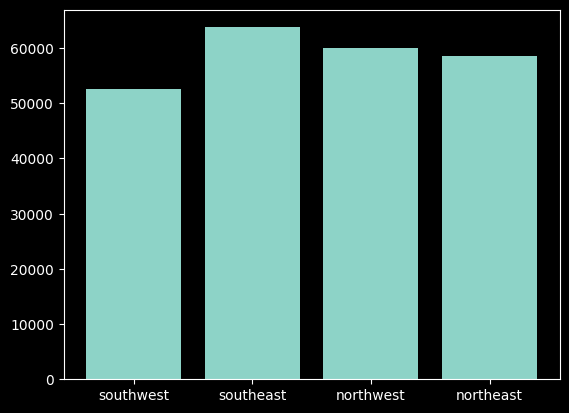

In [417]:
plt.bar(data["region"],data["charges"])
plt.show()

Label Encoding

In [418]:
# Use LabelEncoder to encode categorical values into numbers

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [419]:
# Use LabelEncoder to encode the rest of categorical values into numbers

data['sex']=le.fit_transform(data['sex'])
data['smoker']=le.fit_transform(data['smoker'])
data['region']=le.fit_transform(data['region'])

Feature Selection

In [420]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


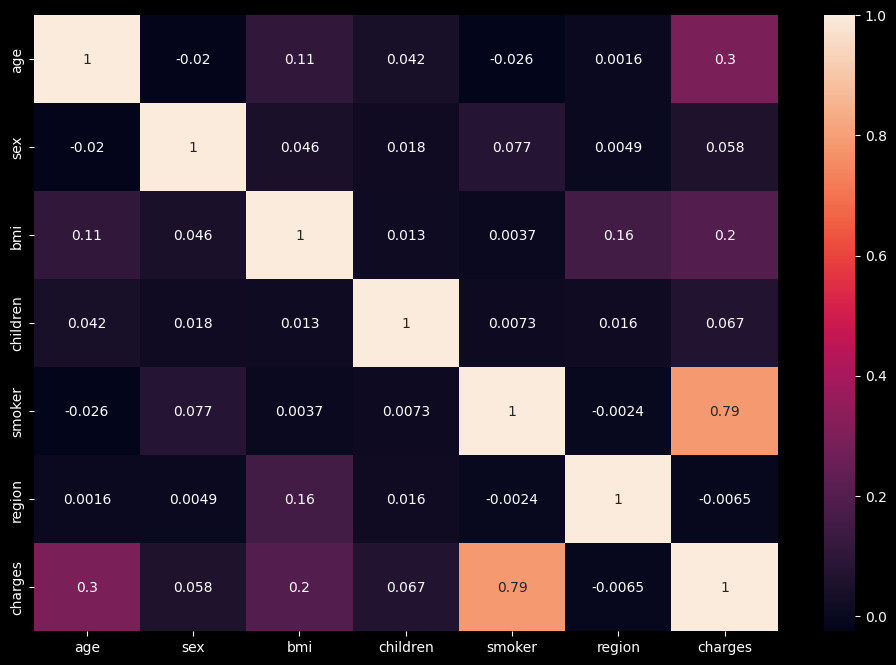

In [421]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

Train - test   split

In [422]:
from sklearn.model_selection import train_test_split

X=data.drop(["charges"],axis=1)

Y=data["charges"]

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

In [423]:
# Scale all features using StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


Linear regression

In [424]:
# Use DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
l = LinearRegression()
l.fit(X_train,Y_train)
y_test_pred_line = l.predict(X_test)

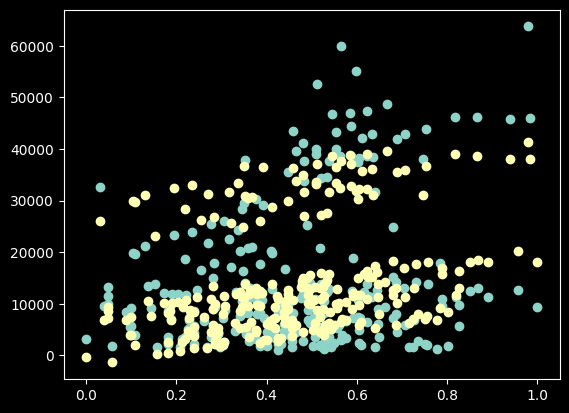

In [425]:
plt.scatter(pd.DataFrame(X_test)[2],Y_test)
plt.scatter(pd.DataFrame(X_test)[2],y_test_pred_line)
plt.show()

In [426]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_test_pred_line)
print("Accuracy:", r2)


Accuracy: 0.8090517262313444


Polynomial regression

In [427]:
from sklearn.preprocessing import PolynomialFeatures
p = PolynomialFeatures(degree=2)
X_train = p.fit_transform(X_train)
X_test = p.fit_transform(X_test)
l0 = LinearRegression()
l0.fit(X_train,Y_train)
y_test_pred_poly = l0.predict(X_test)

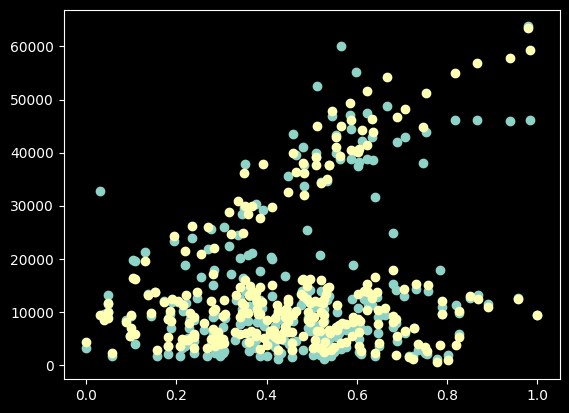

In [428]:
plt.scatter(pd.DataFrame(X_test)[3],Y_test)
plt.scatter(pd.DataFrame(X_test)[3],y_test_pred_poly)
plt.show()

In [429]:
r2 = r2_score(Y_test, y_test_pred_poly)
print("Accuracy:", r2)



Accuracy: 0.8787252582541433
